In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data (main)

In [2]:
df_tweet = pd.read_csv(r"E:\BINAR\Gold - Challenge\DATASET\data.csv", encoding='ISO-8859-1')
df_tweet.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0          0  
2         0        0            0          0  
3         0        0            0          0  
4         0        0            1          0

In [3]:
print("Dataset size:", df_tweet.shape)
print("Columns are:", df_tweet.columns)

Dataset size: (13169, 13)
Columns are: Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')


In [4]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


# Filter Data (main) to be explored

In [5]:
df = pd.DataFrame(df_tweet[['Tweet']])
df

Tweet
0      - disaat semua cowok berusaha melacak perhatia...
1      RT USER: USER siapa yang telat ngasih tau elu?...
2      41. Kadang aku berfikir, kenapa aku tetap perc...
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4      USER USER Kaum cebong kapir udah keliatan dong...
...                                                  ...
13164  USER jangan asal ngomong ndasmu. congor lu yg ...
13165                       USER Kasur mana enak kunyuk'
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167  USER USER USER USER Bom yang real mudah terdet...
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...

[13169 rows x 1 columns]

## Visualization of word occurances

(-0.5, 399.5, 199.5, -0.5)

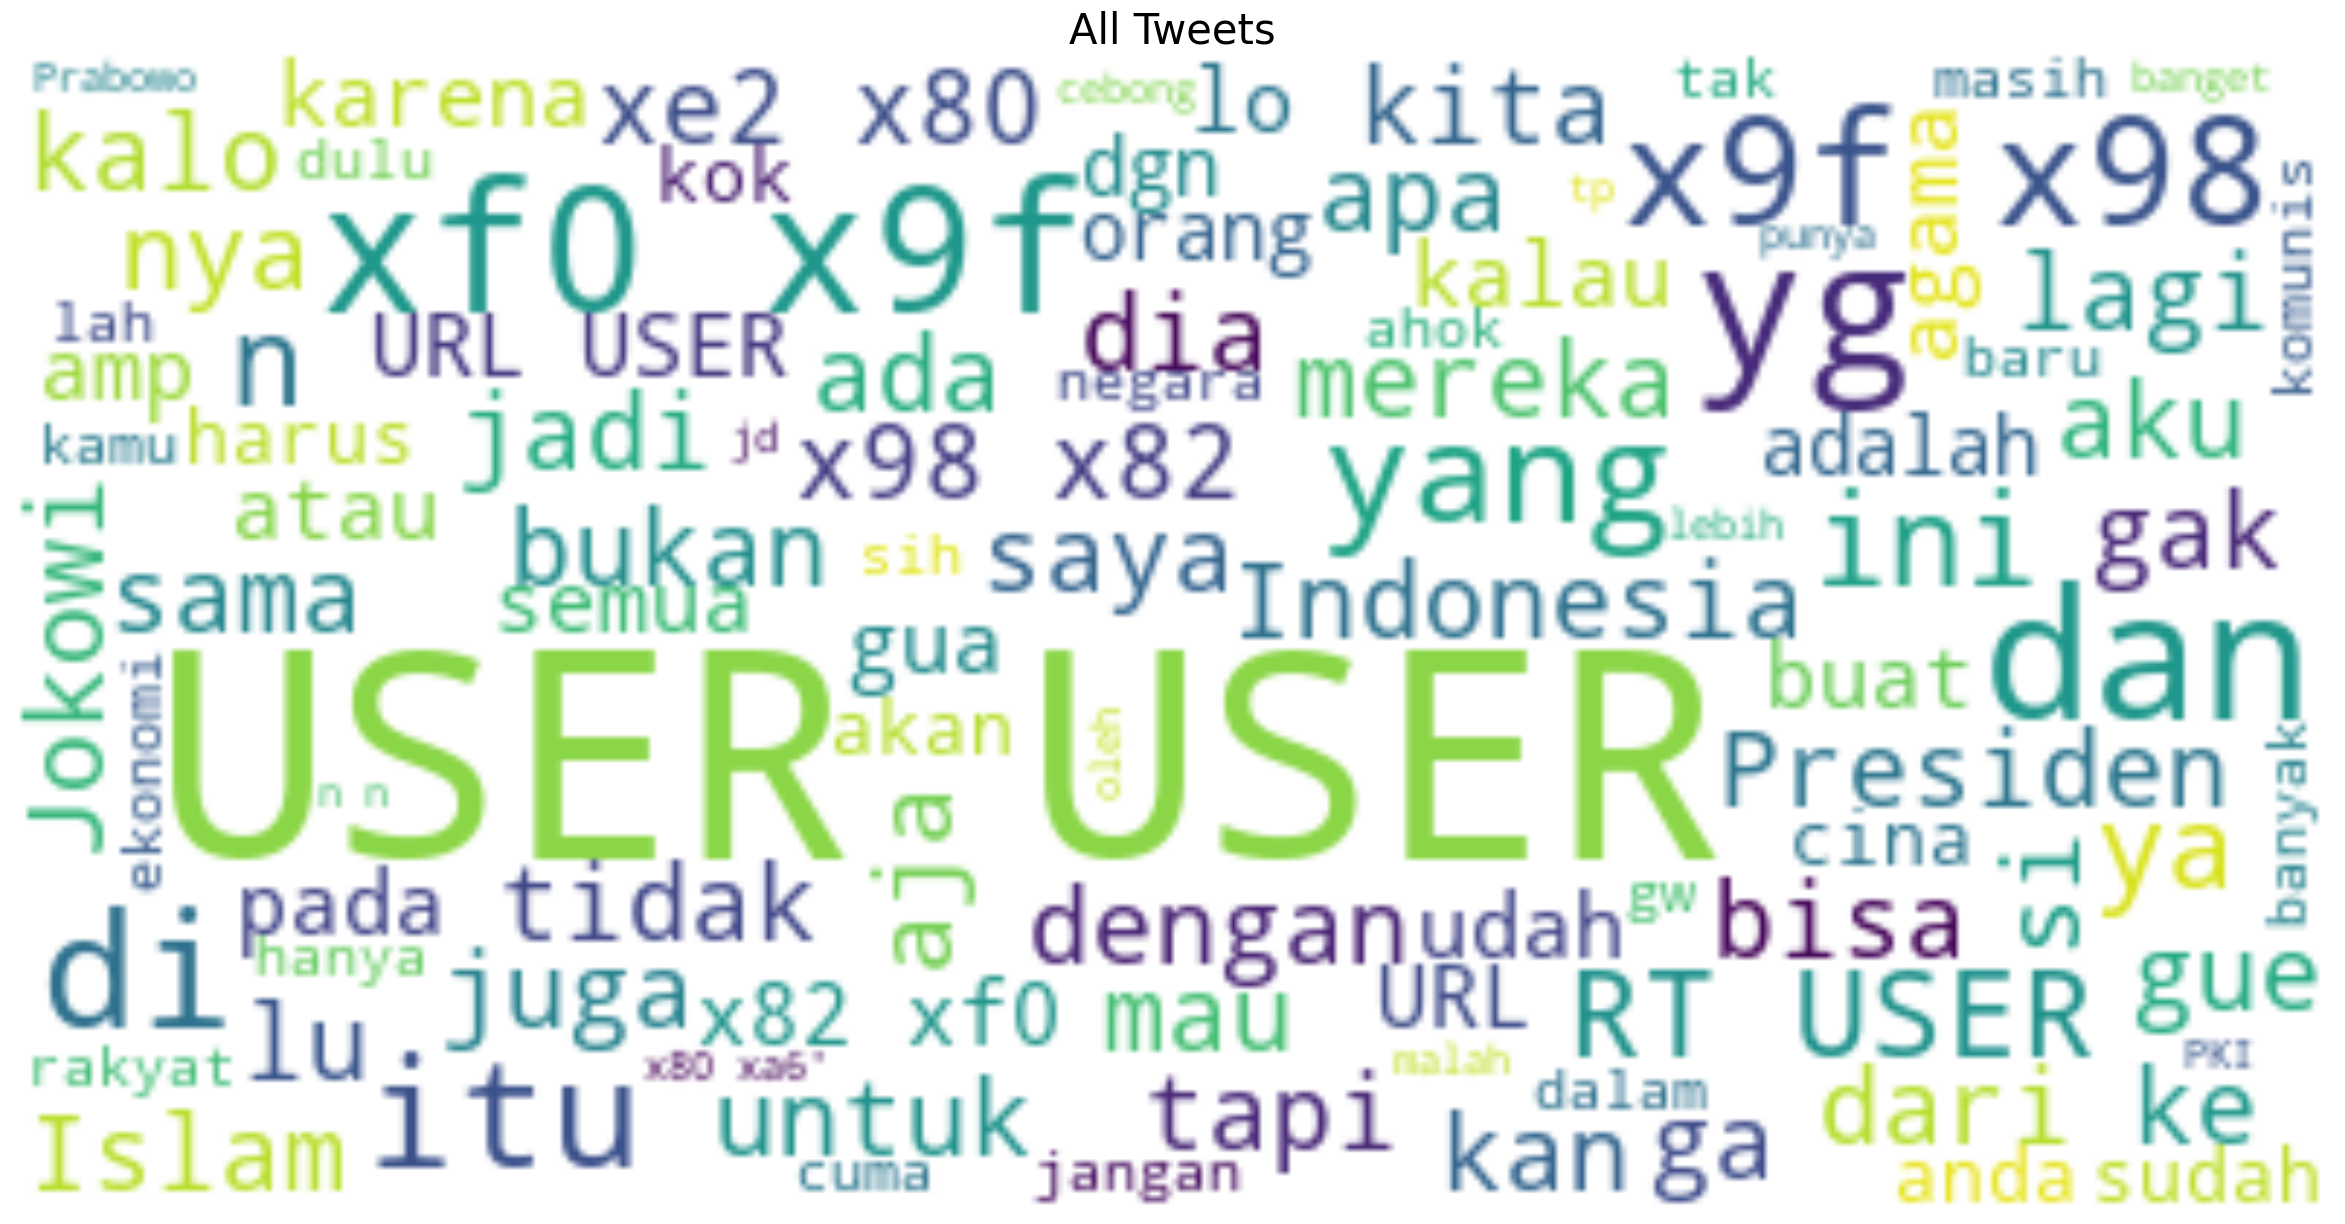

In [6]:
from wordcloud import WordCloud, ImageColorGenerator
# Start with one review:
tweet_All = " ".join(review for review in df.Tweet)

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

# Display the generated image:
plt.figure(figsize  = (30,30))
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.title('All Tweets', fontsize=30)
plt.axis('off')

# Cleaning Tweety Data

In [7]:
#Function for cleaning
def Clean(Tweet):
    #lowercase for every word
    Tweet = Tweet.lower()

    #Clean Pattern
    #remove USER
    Tweet = re.sub(r'user|user:', ' ', Tweet)
    #remove 'RT'
    Tweet = re.sub(r'^rt[\s]+| rt', ' ', Tweet)
    #remove 'URL'
    Tweet = re.sub(r'^url[\s]+| url', ' ', Tweet)
    #remove HTTPS
    Tweet = re.sub(r'https\S+|https', ' ', Tweet)
    #remove HTTP
    Tweet = re.sub(r'http\S+|http', ' ', Tweet)

    #Clean_Unnecessary_Character
    #remove \n or every word afte '\' with space
    Tweet = re.sub(r'\\n|\\[a-zA-Z0-9]+', ' ', Tweet)
    #remove text emoji
    Tweet = re.sub(r'[^a-zA-Z0-9\s]{2,}|:[a-zA-Z0-9]{0,}', ' ', Tweet)
    #remove &amp
    Tweet = re.sub(r'&amp', ' ', Tweet)
    #remove unnecessary character 
    Tweet = re.sub(r'[^0-9a-zA-Z\s]+', ' ', Tweet)
    #remove extra space
    Tweet = re.sub(r'  +', ' ', Tweet)
    #remove space at the start or the end of string
    Tweet = re.sub(r'^ +| +$', '', Tweet)
    
    return Tweet

In [8]:
df['clean_Tweet'] = df['Tweet'].apply(Clean)
df.drop_duplicates(subset = 'clean_Tweet', keep = 'first', inplace = True)
df.head(20)

Tweet  \
0   - disaat semua cowok berusaha melacak perhatia...   
1   RT USER: USER siapa yang telat ngasih tau elu?...   
2   41. Kadang aku berfikir, kenapa aku tetap perc...   
3   USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   
4   USER USER Kaum cebong kapir udah keliatan dong...   
5   USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...   
6   deklarasi pilkada 2018 aman dan anti hoax warg...   
7   Gue baru aja kelar re-watch Aldnoah Zero!!! pa...   
8   Nah admin belanja satu lagi port terbaik nak m...   
9                       USER Enak lg klo smbil ngewe'   
10  Setidaknya gw punya jari tengah buat lu, sebel...   
11  USER USER USER USER BANCI KALENG MALU GA BISA ...   
12  Kalo belajar ekonomi mestinya jago memprivatis...   
13  Aktor huruhara 98 Prabowo S ingin lengserkan p...   
14  USER Bu guru enakan jadi jablay atau guru esde...   
15  USER USER USER USER USER USER Lawan bicara gw ...   
16        Belakangan ini kok fikiran ampas banget ya'   
17  Ari sarua beki mah repeh monyet\xf0\x9f\x98\x8...   
18  Jadi cowo itu harus Gantle kalo ga Gantle itu ...   
19                USER Slga mnr bom \xf0\x9f\x98\x82'   

                                          clean_Tweet  
0   disaat semua cowok berusaha melacak perhatian ...  
1   siapa yang telat ngasih tau elu edan sarap gue...  
2   41 kadang aku berfikir kenapa aku tetap percay...  
3   aku itu aku ku tau matamu sipit tapi diliat da...  
4   kaum cebong kapir udah keliatan dongoknya dari...  
5                                  ya bani taplak dkk  
6   deklarasi pilkada 2018 aman dan anti hoax warg...  
7   gue baru aja kelar re watch aldnoah zero palin...  
8   nah admin belanja satu lagi port terbaik nak m...  
9                             enak lg klo smbil ngewe  
10  setidaknya gw punya jari tengah buat lu sebelo...  
11  banci kaleng malu ga bisa jawab pertanyaan kam...  
12  kalo belajar ekonomi mestinya jago memprivatis...  
13  aktor huruhara 98 prabowo s ingin lengserkan p...  
14  bu guru enakan jadi jablay atau guru esde sih ...  
15  lawan bicara gw gak intelek kyk loe yg otak ga...  
16         belakangan ini kok fikiran ampas banget ya  
17                    ari sarua beki mah repeh monyet  
18  jadi cowo itu harus gantle kalo ga gantle itu ...  
19                                       slga mnr bom

# Exploratory Data Analysis

## Tokenization

In [9]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['clean_Tweet'].apply(tokenization)
df.head(20)

Tweet  \
0   - disaat semua cowok berusaha melacak perhatia...   
1   RT USER: USER siapa yang telat ngasih tau elu?...   
2   41. Kadang aku berfikir, kenapa aku tetap perc...   
3   USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   
4   USER USER Kaum cebong kapir udah keliatan dong...   
5   USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...   
6   deklarasi pilkada 2018 aman dan anti hoax warg...   
7   Gue baru aja kelar re-watch Aldnoah Zero!!! pa...   
8   Nah admin belanja satu lagi port terbaik nak m...   
9                       USER Enak lg klo smbil ngewe'   
10  Setidaknya gw punya jari tengah buat lu, sebel...   
11  USER USER USER USER BANCI KALENG MALU GA BISA ...   
12  Kalo belajar ekonomi mestinya jago memprivatis...   
13  Aktor huruhara 98 Prabowo S ingin lengserkan p...   
14  USER Bu guru enakan jadi jablay atau guru esde...   
15  USER USER USER USER USER USER Lawan bicara gw ...   
16        Belakangan ini kok fikiran ampas banget ya'   
17  Ari sarua beki mah repeh monyet\xf0\x9f\x98\x8...   
18  Jadi cowo itu harus Gantle kalo ga Gantle itu ...   
19                USER Slga mnr bom \xf0\x9f\x98\x82'   

                                          clean_Tweet  \
0   disaat semua cowok berusaha melacak perhatian ...   
1   siapa yang telat ngasih tau elu edan sarap gue...   
2   41 kadang aku berfikir kenapa aku tetap percay...   
3   aku itu aku ku tau matamu sipit tapi diliat da...   
4   kaum cebong kapir udah keliatan dongoknya dari...   
5                                  ya bani taplak dkk   
6   deklarasi pilkada 2018 aman dan anti hoax warg...   
7   gue baru aja kelar re watch aldnoah zero palin...   
8   nah admin belanja satu lagi port terbaik nak m...   
9                             enak lg klo smbil ngewe   
10  setidaknya gw punya jari tengah buat lu sebelo...   
11  banci kaleng malu ga bisa jawab pertanyaan kam...   
12  kalo belajar ekonomi mestinya jago memprivatis...   
13  aktor huruhara 98 prabowo s ingin lengserkan p...   
14  bu guru enakan jadi jablay atau guru esde sih ...   
15  lawan bicara gw gak intelek kyk loe yg otak ga...   
16         belakangan ini kok fikiran ampas banget ya   
17                    ari sarua beki mah repeh monyet   
18  jadi cowo itu harus gantle kalo ga gantle itu ...   
19                                       slga mnr bom   

                                      Tweet_tokenized  
0   [disaat, semua, cowok, berusaha, melacak, perh...  
1   [siapa, yang, telat, ngasih, tau, elu, edan, s...  
2   [41, kadang, aku, berfikir, kenapa, aku, tetap...  
3   [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...  
4   [kaum, cebong, kapir, udah, keliatan, dongokny...  
5                             [ya, bani, taplak, dkk]  
6   [deklarasi, pilkada, 2018, aman, dan, anti, ho...  
7   [gue, baru, aja, kelar, re, watch, aldnoah, ze...  
8   [nah, admin, belanja, satu, lagi, port, terbai...  
9                       [enak, lg, klo, smbil, ngewe]  
10  [setidaknya, gw, punya, jari, tengah, buat, lu...  
11  [banci, kaleng, malu, ga, bisa, jawab, pertany...  
12  [kalo, belajar, ekonomi, mestinya, jago, mempr...  
13  [aktor, huruhara, 98, prabowo, s, ingin, lengs...  
14  [bu, guru, enakan, jadi, jablay, atau, guru, e...  
15  [lawan, bicara, gw, gak, intelek, kyk, loe, yg...  
16  [belakangan, ini, kok, fikiran, ampas, banget,...  
17             [ari, sarua, beki, mah, repeh, monyet]  
18  [jadi, cowo, itu, harus, gantle, kalo, ga, gan...  
19                                   [slga, mnr, bom]

In [10]:
#Other Option for Tokenization
#from nltk.tokenize import word_tokenize

### Tokenization into list

In [11]:
Tweet = df.clean_Tweet.to_list()

In [12]:
Tweet_split = []
for kalimat in Tweet:
    kalimat_split = kalimat.split()
    Tweet_split.append(kalimat_split)

for i in range(10):
    print(i)
    print(Tweet_split[i])

0
['disaat', 'semua', 'cowok', 'berusaha', 'melacak', 'perhatian', 'gue', 'loe', 'lantas', 'remehkan', 'perhatian', 'yg', 'gue', 'kasih', 'khusus', 'ke', 'elo', 'basic', 'elo', 'cowok', 'bego']
1
['siapa', 'yang', 'telat', 'ngasih', 'tau', 'elu', 'edan', 'sarap', 'gue', 'bergaul', 'dengan', 'cigax', 'jifla', 'calis', 'sama', 'siapa', 'noh', 'licew', 'juga']
2
['41', 'kadang', 'aku', 'berfikir', 'kenapa', 'aku', 'tetap', 'percaya', 'pada', 'tuhan', 'padahal', 'aku', 'selalu', 'jatuh', 'berkali', 'kali', 'kadang', 'aku', 'merasa', 'tuhan', 'itu', 'ninggalkan', 'aku', 'sendirian', 'ketika', 'orangtuaku', 'berencana', 'berpisah', 'ketika', 'kakakku', 'lebih', 'memilih', 'jadi', 'kristen', 'ketika', 'aku', 'anak', 'ter']
3
['aku', 'itu', 'aku', 'ku', 'tau', 'matamu', 'sipit', 'tapi', 'diliat', 'dari', 'mana', 'itu', 'aku']
4
['kaum', 'cebong', 'kapir', 'udah', 'keliatan', 'dongoknya', 'dari', 'awal', 'tambah', 'dongok', 'lagi', 'hahahah']
5
['ya', 'bani', 'taplak', 'dkk']
6
['deklarasi', 'p

## Lemmatization using kamusalay

In [13]:
kamus_alay = pd.read_csv(r"E:\BINAR\new_kamusalay.csv", encoding = 'ISO-8859-1', header = None)
kamus_alay = kamus_alay.rename(columns={0: 'kata alay', 1: 'arti kata'})
kamus_alay.head(10)

kata alay                 arti kata
0  anakjakartaasikasik  anak jakarta asyik asyik
1         pakcikdahtua         pak cik sudah tua
2       pakcikmudalagi         pak cik muda lagi
3          t3tapjokowi              tetap jokowi
4                   3x                 tiga kali
5               aamiin                      amin
6              aamiinn                      amin
7                aamin                      amin
8              aammiin                      amin
9                 abis                     habis

In [14]:
#Create dictionary using words list from kamus_alay
kamus_alay_dict = dict(zip(kamus_alay['kata alay'], kamus_alay['arti kata']))
len(kamus_alay_dict)

15167

### Selecting the 'alay' word 

In [15]:
wn = list(kamus_alay_dict.values())
def lemmatization(text):
    text = [kamus_alay_dict[word] for word in text if word in kamus_alay_dict]
    return text

In [16]:
df['Tweet_edit_alay'] = df['Tweet_tokenized'].apply(lemmatization)
df.head()

Tweet  \
0  - disaat semua cowok berusaha melacak perhatia...   
1  RT USER: USER siapa yang telat ngasih tau elu?...   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   
4  USER USER Kaum cebong kapir udah keliatan dong...   

                                         clean_Tweet  \
0  disaat semua cowok berusaha melacak perhatian ...   
1  siapa yang telat ngasih tau elu edan sarap gue...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  aku itu aku ku tau matamu sipit tapi diliat da...   
4  kaum cebong kapir udah keliatan dongoknya dari...   

                                     Tweet_tokenized  \
0  [disaat, semua, cowok, berusaha, melacak, perh...   
1  [siapa, yang, telat, ngasih, tau, elu, edan, s...   
2  [41, kadang, aku, berfikir, kenapa, aku, tetap...   
3  [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...   
4  [kaum, cebong, kapir, udah, keliatan, dongokny...   

                          Tweet_edit_alay  
0       [di saat, kamu, yang, kamu, kamu]  
1                    [memberi, kamu, itu]  
2   [berpikir, meninggalkan, orang tuaku]  
3                               [dilihat]  
4  [kafir, sudah, kelihatan, dungu, haha]

### Edit the 'alay' word

In [17]:
def lemmatization(text):
    newlist = []
    for word in text:
        if word in kamus_alay_dict:
            text = kamus_alay_dict[word]
            newlist.append(text)
        else:
            text = word
            newlist.append(text)
    return newlist

In [18]:
df['Tweet_edit_alay'] = df['Tweet_tokenized'].apply(lemmatization)
df.head()

Tweet  \
0  - disaat semua cowok berusaha melacak perhatia...   
1  RT USER: USER siapa yang telat ngasih tau elu?...   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   
4  USER USER Kaum cebong kapir udah keliatan dong...   

                                         clean_Tweet  \
0  disaat semua cowok berusaha melacak perhatian ...   
1  siapa yang telat ngasih tau elu edan sarap gue...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  aku itu aku ku tau matamu sipit tapi diliat da...   
4  kaum cebong kapir udah keliatan dongoknya dari...   

                                     Tweet_tokenized  \
0  [disaat, semua, cowok, berusaha, melacak, perh...   
1  [siapa, yang, telat, ngasih, tau, elu, edan, s...   
2  [41, kadang, aku, berfikir, kenapa, aku, tetap...   
3  [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...   
4  [kaum, cebong, kapir, udah, keliatan, dongokny...   

                                     Tweet_edit_alay  
0  [di saat, semua, cowok, berusaha, melacak, per...  
1  [siapa, yang, telat, memberi, tau, kamu, edan,...  
2  [41, kadang, aku, berpikir, kenapa, aku, tetap...  
3  [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...  
4  [kaum, cebong, kafir, sudah, kelihatan, dongok...

### Kamus Alay into List

In [19]:
for i in range(len(Tweet)):
    words = Tweet[i].split() # Pecah kalimat menjadi kata-kata
    for j in range(len(words)):
        if words[j] in kamus_alay_dict:
            words[j] = kamus_alay_dict[words[j]]
    Tweet[i] = ' '.join(words) # Gabungkan kata-kata menjadi kalimat
Tweet[:3]

['di saat semua cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus ke kamu basic kamu cowok bego',
 'siapa yang telat memberi tau kamu edan sarap gue bergaul dengan cigax jifla calis sama siapa itu licew juga',
 '41 kadang aku berpikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan itu meninggalkan aku sendirian ketika orang tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika aku anak ter']

## Remove stopwords

source: Stopwords By : Tala from paper : A Study of Stemming Effects on Information Retrieval in Bahasa Indonesia Source : https://github.com/masdevid/ID-Stopwords

In [20]:
f = open(r"E:\BINAR\tala-stopwords-indonesia.txt")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

len(stopword_list)

758

In [21]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword_list]
    return text
    
df['Tweet_non_stopwords'] = df['Tweet_edit_alay'].apply(remove_stopwords)
df.head()

Tweet  \
0  - disaat semua cowok berusaha melacak perhatia...   
1  RT USER: USER siapa yang telat ngasih tau elu?...   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   
4  USER USER Kaum cebong kapir udah keliatan dong...   

                                         clean_Tweet  \
0  disaat semua cowok berusaha melacak perhatian ...   
1  siapa yang telat ngasih tau elu edan sarap gue...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  aku itu aku ku tau matamu sipit tapi diliat da...   
4  kaum cebong kapir udah keliatan dongoknya dari...   

                                     Tweet_tokenized  \
0  [disaat, semua, cowok, berusaha, melacak, perh...   
1  [siapa, yang, telat, ngasih, tau, elu, edan, s...   
2  [41, kadang, aku, berfikir, kenapa, aku, tetap...   
3  [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...   
4  [kaum, cebong, kapir, udah, keliatan, dongokny...   

                                     Tweet_edit_alay  \
0  [di saat, semua, cowok, berusaha, melacak, per...   
1  [siapa, yang, telat, memberi, tau, kamu, edan,...   
2  [41, kadang, aku, berpikir, kenapa, aku, tetap...   
3  [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...   
4  [kaum, cebong, kafir, sudah, kelihatan, dongok...   

                                 Tweet_non_stopwords  
0  [di saat, cowok, berusaha, melacak, perhatian,...  
1  [telat, tau, edan, sarap, gue, bergaul, cigax,...  
2  [41, kadang, berpikir, percaya, tuhan, jatuh, ...  
3                           [ku, tau, matamu, sipit]  
4      [kaum, cebong, kafir, dongoknya, dungu, haha]

# Final Visual Comparison

## Filter selected data to be visualized

In [22]:
df_visualization = df.filter(items=['clean_Tweet', 'Tweet_edit_alay', 'Tweet_non_stopwords'])
df_visualization.head(10)

clean_Tweet  \
0  disaat semua cowok berusaha melacak perhatian ...   
1  siapa yang telat ngasih tau elu edan sarap gue...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  aku itu aku ku tau matamu sipit tapi diliat da...   
4  kaum cebong kapir udah keliatan dongoknya dari...   
5                                 ya bani taplak dkk   
6  deklarasi pilkada 2018 aman dan anti hoax warg...   
7  gue baru aja kelar re watch aldnoah zero palin...   
8  nah admin belanja satu lagi port terbaik nak m...   
9                            enak lg klo smbil ngewe   

                                     Tweet_edit_alay  \
0  [di saat, semua, cowok, berusaha, melacak, per...   
1  [siapa, yang, telat, memberi, tau, kamu, edan,...   
2  [41, kadang, aku, berpikir, kenapa, aku, tetap...   
3  [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...   
4  [kaum, cebong, kafir, sudah, kelihatan, dongok...   
5                [ya, bani, taplak, dan kawan kawan]   
6  [deklarasi, pilihan kepala daerah, 2018, aman,...   
7  [gue, baru, saja, selesai, re, watch, aldnoah,...   
8  [nah, admin, belanja, satu, lagi, port, terbai...   
9                 [enak, lagi, kalau, sambil, ngewe]   

                                 Tweet_non_stopwords  
0  [di saat, cowok, berusaha, melacak, perhatian,...  
1  [telat, tau, edan, sarap, gue, bergaul, cigax,...  
2  [41, kadang, berpikir, percaya, tuhan, jatuh, ...  
3                           [ku, tau, matamu, sipit]  
4      [kaum, cebong, kafir, dongoknya, dungu, haha]  
5                [ya, bani, taplak, dan kawan kawan]  
6  [deklarasi, pilihan kepala daerah, 2018, aman,...  
7  [gue, selesai, re, watch, aldnoah, zero, kampr...  
8  [admin, belanja, port, terbaik, nak, makan, ai...  
9                                      [enak, ngewe]

## Convert every column with list value to be string

In [23]:
df_visualization['Tweet_edit_alay_2'] = df_visualization['Tweet_edit_alay'].apply(lambda x: ' '.join(map(str, x)))
df_visualization

clean_Tweet  \
0      disaat semua cowok berusaha melacak perhatian ...   
1      siapa yang telat ngasih tau elu edan sarap gue...   
2      41 kadang aku berfikir kenapa aku tetap percay...   
3      aku itu aku ku tau matamu sipit tapi diliat da...   
4      kaum cebong kapir udah keliatan dongoknya dari...   
...                                                  ...   
13164  jangan asal ngomong ndasmu congor lu yg sekate...   
13165                             kasur mana enak kunyuk   
13166                   hati hati bisu g lagi bosan huft   
13167  bom yang real mudah terdeteksi bom yang terkub...   
13168       mana situ ngasih itu cuma foto ya kutil onta   

                                         Tweet_edit_alay  \
0      [di saat, semua, cowok, berusaha, melacak, per...   
1      [siapa, yang, telat, memberi, tau, kamu, edan,...   
2      [41, kadang, aku, berpikir, kenapa, aku, tetap...   
3      [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...   
4      [kaum, cebong, kafir, sudah, kelihatan, dongok...   
...                                                  ...   
13164  [jangan, asal, berbicara, ndasmu, congor, kamu...   
13165                        [kasur, mana, enak, kunyuk]   
13166        [hati, hati, bisu, tidak, lagi, bosan, duh]   
13167  [bom, yang, real, mudah, terdeteksi, bom, yang...   
13168  [mana, situ, memberi, itu, cuma, foto, ya, kut...   

                                     Tweet_non_stopwords  \
0      [di saat, cowok, berusaha, melacak, perhatian,...   
1      [telat, tau, edan, sarap, gue, bergaul, cigax,...   
2      [41, kadang, berpikir, percaya, tuhan, jatuh, ...   
3                               [ku, tau, matamu, sipit]   
4          [kaum, cebong, kafir, dongoknya, dungu, haha]   
...                                                  ...   
13164   [berbicara, ndasmu, congor, sekata kata, anjing]   
13165                              [kasur, enak, kunyuk]   
13166                     [hati, hati, bisu, bosan, duh]   
13167  [bom, real, mudah, terdeteksi, bom, terkubur, ...   
13168                      [situ, foto, ya, kutil, onta]   

                                       Tweet_edit_alay_2  
0      di saat semua cowok berusaha melacak perhatian...  
1      siapa yang telat memberi tau kamu edan sarap g...  
2      41 kadang aku berpikir kenapa aku tetap percay...  
3      aku itu aku ku tau matamu sipit tapi dilihat d...  
4      kaum cebong kafir sudah kelihatan dongoknya da...  
...                                                  ...  
13164  jangan asal berbicara ndasmu congor kamu yang ...  
13165                             kasur mana enak kunyuk  
13166                hati hati bisu tidak lagi bosan duh  
13167  bom yang real mudah terdeteksi bom yang terkub...  
13168      mana situ memberi itu cuma foto ya kutil onta  

[12842 rows x 4 columns]

In [24]:
df_visualization['Tweet_non_stopwords_2'] = df_visualization['Tweet_non_stopwords'].apply(lambda x: ' '.join(map(str, x)))
df_visualization

clean_Tweet  \
0      disaat semua cowok berusaha melacak perhatian ...   
1      siapa yang telat ngasih tau elu edan sarap gue...   
2      41 kadang aku berfikir kenapa aku tetap percay...   
3      aku itu aku ku tau matamu sipit tapi diliat da...   
4      kaum cebong kapir udah keliatan dongoknya dari...   
...                                                  ...   
13164  jangan asal ngomong ndasmu congor lu yg sekate...   
13165                             kasur mana enak kunyuk   
13166                   hati hati bisu g lagi bosan huft   
13167  bom yang real mudah terdeteksi bom yang terkub...   
13168       mana situ ngasih itu cuma foto ya kutil onta   

                                         Tweet_edit_alay  \
0      [di saat, semua, cowok, berusaha, melacak, per...   
1      [siapa, yang, telat, memberi, tau, kamu, edan,...   
2      [41, kadang, aku, berpikir, kenapa, aku, tetap...   
3      [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...   
4      [kaum, cebong, kafir, sudah, kelihatan, dongok...   
...                                                  ...   
13164  [jangan, asal, berbicara, ndasmu, congor, kamu...   
13165                        [kasur, mana, enak, kunyuk]   
13166        [hati, hati, bisu, tidak, lagi, bosan, duh]   
13167  [bom, yang, real, mudah, terdeteksi, bom, yang...   
13168  [mana, situ, memberi, itu, cuma, foto, ya, kut...   

                                     Tweet_non_stopwords  \
0      [di saat, cowok, berusaha, melacak, perhatian,...   
1      [telat, tau, edan, sarap, gue, bergaul, cigax,...   
2      [41, kadang, berpikir, percaya, tuhan, jatuh, ...   
3                               [ku, tau, matamu, sipit]   
4          [kaum, cebong, kafir, dongoknya, dungu, haha]   
...                                                  ...   
13164   [berbicara, ndasmu, congor, sekata kata, anjing]   
13165                              [kasur, enak, kunyuk]   
13166                     [hati, hati, bisu, bosan, duh]   
13167  [bom, real, mudah, terdeteksi, bom, terkubur, ...   
13168                      [situ, foto, ya, kutil, onta]   

                                       Tweet_edit_alay_2  \
0      di saat semua cowok berusaha melacak perhatian...   
1      siapa yang telat memberi tau kamu edan sarap g...   
2      41 kadang aku berpikir kenapa aku tetap percay...   
3      aku itu aku ku tau matamu sipit tapi dilihat d...   
4      kaum cebong kafir sudah kelihatan dongoknya da...   
...                                                  ...   
13164  jangan asal berbicara ndasmu congor kamu yang ...   
13165                             kasur mana enak kunyuk   
13166                hati hati bisu tidak lagi bosan duh   
13167  bom yang real mudah terdeteksi bom yang terkub...   
13168      mana situ memberi itu cuma foto ya kutil onta   

                                   Tweet_non_stopwords_2  
0      di saat cowok berusaha melacak perhatian gue l...  
1      telat tau edan sarap gue bergaul cigax jifla c...  
2      41 kadang berpikir percaya tuhan jatuh berkali...  
3                                    ku tau matamu sipit  
4                 kaum cebong kafir dongoknya dungu haha  
...                                                  ...  
13164         berbicara ndasmu congor sekata kata anjing  
13165                                  kasur enak kunyuk  
13166                           hati hati bisu bosan duh  
13167  bom real mudah terdeteksi bom terkubur dahsyat...  
13168                            situ foto ya kutil onta  

[12842 rows x 5 columns]

## Filter selected data to be visualized

In [25]:
df_Final = df_visualization.filter(items=['clean_Tweet', 'Tweet_edit_alay_2', 'Tweet_non_stopwords_2'])
df_Final.head(10)

clean_Tweet  \
0  disaat semua cowok berusaha melacak perhatian ...   
1  siapa yang telat ngasih tau elu edan sarap gue...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  aku itu aku ku tau matamu sipit tapi diliat da...   
4  kaum cebong kapir udah keliatan dongoknya dari...   
5                                 ya bani taplak dkk   
6  deklarasi pilkada 2018 aman dan anti hoax warg...   
7  gue baru aja kelar re watch aldnoah zero palin...   
8  nah admin belanja satu lagi port terbaik nak m...   
9                            enak lg klo smbil ngewe   

                                   Tweet_edit_alay_2  \
0  di saat semua cowok berusaha melacak perhatian...   
1  siapa yang telat memberi tau kamu edan sarap g...   
2  41 kadang aku berpikir kenapa aku tetap percay...   
3  aku itu aku ku tau matamu sipit tapi dilihat d...   
4  kaum cebong kafir sudah kelihatan dongoknya da...   
5                     ya bani taplak dan kawan kawan   
6  deklarasi pilihan kepala daerah 2018 aman dan ...   
7  gue baru saja selesai re watch aldnoah zero pa...   
8  nah admin belanja satu lagi port terbaik nak m...   
9                       enak lagi kalau sambil ngewe   

                               Tweet_non_stopwords_2  
0  di saat cowok berusaha melacak perhatian gue l...  
1  telat tau edan sarap gue bergaul cigax jifla c...  
2  41 kadang berpikir percaya tuhan jatuh berkali...  
3                                ku tau matamu sipit  
4             kaum cebong kafir dongoknya dungu haha  
5                     ya bani taplak dan kawan kawan  
6  deklarasi pilihan kepala daerah 2018 aman anti...  
7  gue selesai re watch aldnoah zero kampret 2 ka...  
8  admin belanja port terbaik nak makan ais kepal...  
9                                         enak ngewe

## Visualization for comparison 3 different output data 

(-0.5, 399.5, 199.5, -0.5)

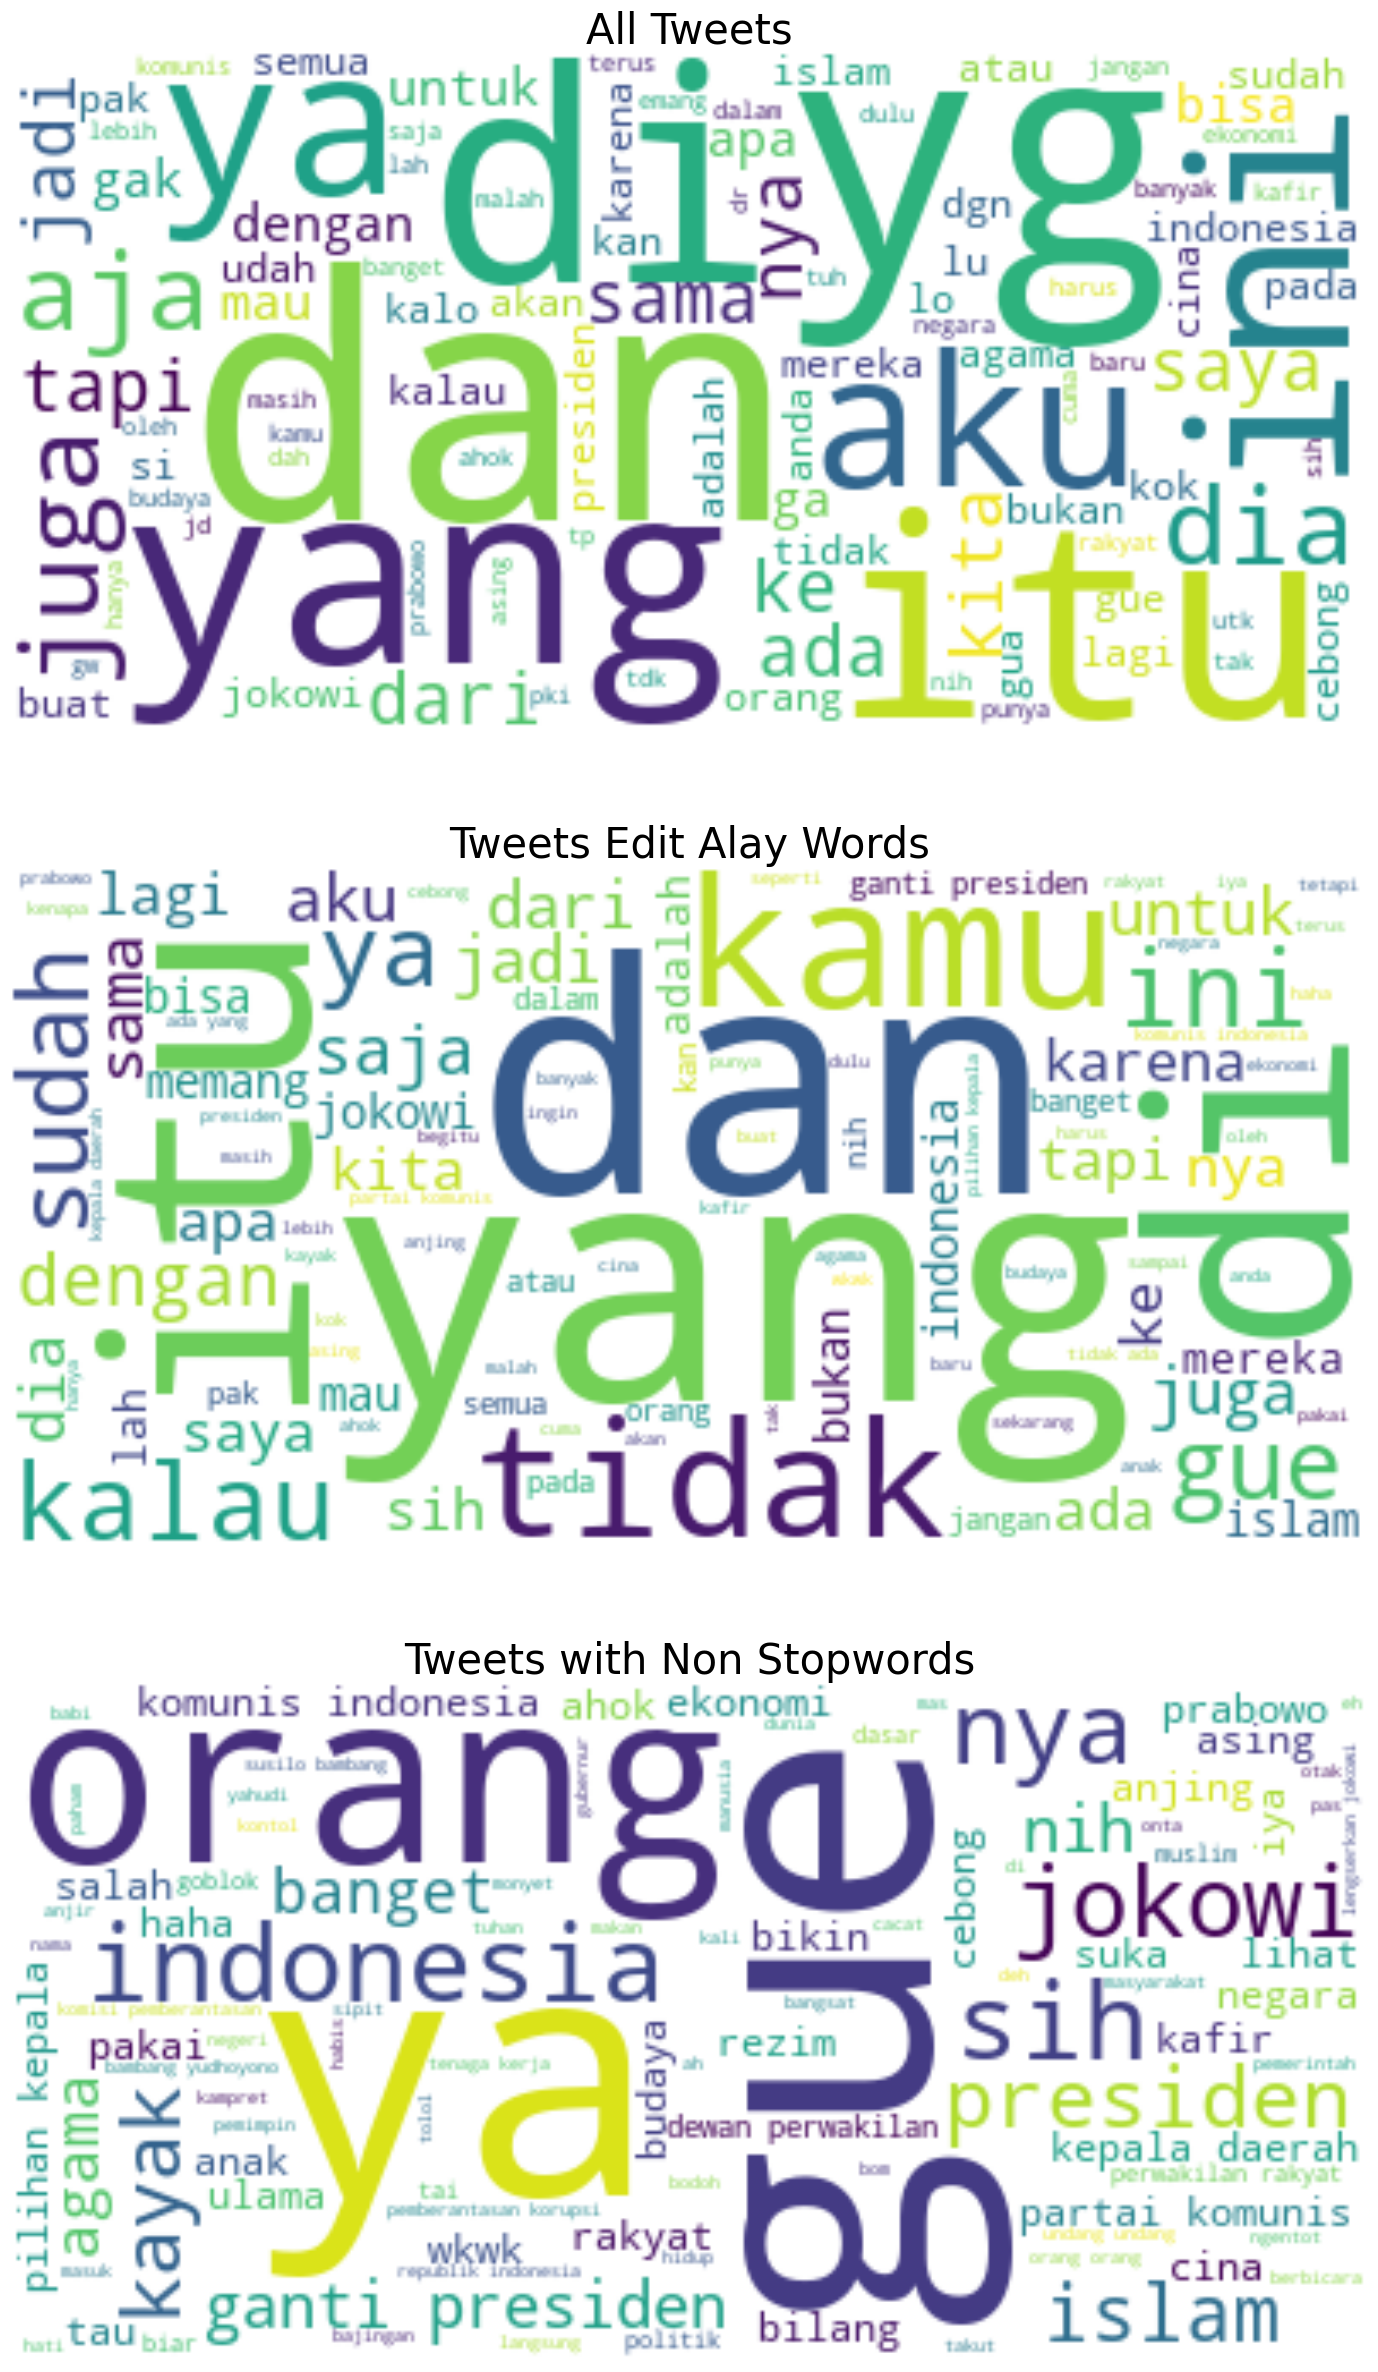

In [26]:
from wordcloud import WordCloud, ImageColorGenerator

# Create the parameter input
tweet_All = " ".join(review for review in df_Final.clean_Tweet)
tweet_Edit_Alay = " ".join(review for review in df_Final.Tweet_edit_alay_2)
tweet_Non_Stopwords = " ".join(review for review in df_Final.Tweet_non_stopwords_2)

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(tweet_All)
wordcloud_Edit_Alay = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(tweet_Edit_Alay)
wordcloud_Non_Stopwords = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(tweet_Non_Stopwords)

# Display the generated image:
fig, ax = plt.subplots(3, 1, figsize  = (30,30))

ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_Edit_Alay, interpolation='bilinear')
ax[1].set_title('Tweets Edit Alay Words',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_Non_Stopwords, interpolation='bilinear')
ax[2].set_title('Tweets with Non Stopwords',fontsize=30)
ax[2].axis('off')

# Abusive Word Explore

In [27]:
df_tweet.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0          0  
2         0        0            0          0  
3         0        0            0          0  
4         0        0            1          0

In [28]:
df.head()

Tweet  \
0  - disaat semua cowok berusaha melacak perhatia...   
1  RT USER: USER siapa yang telat ngasih tau elu?...   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   
4  USER USER Kaum cebong kapir udah keliatan dong...   

                                         clean_Tweet  \
0  disaat semua cowok berusaha melacak perhatian ...   
1  siapa yang telat ngasih tau elu edan sarap gue...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  aku itu aku ku tau matamu sipit tapi diliat da...   
4  kaum cebong kapir udah keliatan dongoknya dari...   

                                     Tweet_tokenized  \
0  [disaat, semua, cowok, berusaha, melacak, perh...   
1  [siapa, yang, telat, ngasih, tau, elu, edan, s...   
2  [41, kadang, aku, berfikir, kenapa, aku, tetap...   
3  [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...   
4  [kaum, cebong, kapir, udah, keliatan, dongokny...   

                                     Tweet_edit_alay  \
0  [di saat, semua, cowok, berusaha, melacak, per...   
1  [siapa, yang, telat, memberi, tau, kamu, edan,...   
2  [41, kadang, aku, berpikir, kenapa, aku, tetap...   
3  [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...   
4  [kaum, cebong, kafir, sudah, kelihatan, dongok...   

                                 Tweet_non_stopwords  
0  [di saat, cowok, berusaha, melacak, perhatian,...  
1  [telat, tau, edan, sarap, gue, bergaul, cigax,...  
2  [41, kadang, berpikir, percaya, tuhan, jatuh, ...  
3                           [ku, tau, matamu, sipit]  
4      [kaum, cebong, kafir, dongoknya, dungu, haha]

In [29]:
df_filter = pd.DataFrame(df[['Tweet_edit_alay']])
df_filter.head()

Tweet_edit_alay
0  [di saat, semua, cowok, berusaha, melacak, per...
1  [siapa, yang, telat, memberi, tau, kamu, edan,...
2  [41, kadang, aku, berpikir, kenapa, aku, tetap...
3  [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...
4  [kaum, cebong, kafir, sudah, kelihatan, dongok...

## Abusive word list

In [30]:
df_abusive = pd.read_csv(r"E:\BINAR\Binar-Gold-Challenge\abusive.csv")
df_abusive.head()

ABUSIVE
0     alay
1    ampas
2     buta
3  keparat
4   anjing

In [31]:
abusive_word_list = df_abusive['ABUSIVE'].values.tolist()
len(abusive_word_list)

125

## Count Abusive word and determine Tweet that contain abusive word

### count abusive words in tweet

In [32]:
def count_abusive_word(Tweet):
    i = 0
    for word in Tweet:
        if word in abusive_word_list:
            i += 1
    return i

In [33]:
df_filter['count_abusive'] = df_filter['Tweet_edit_alay'].apply(count_abusive_word)
df_filter.head()

Tweet_edit_alay  count_abusive
0  [di saat, semua, cowok, berusaha, melacak, per...              1
1  [siapa, yang, telat, memberi, tau, kamu, edan,...              2
2  [41, kadang, aku, berpikir, kenapa, aku, tetap...              0
3  [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...              1
4  [kaum, cebong, kafir, sudah, kelihatan, dongok...              3

In [34]:
df_filter['count_abusive'].value_counts()

count_abusive
0     5627
1     5237
2     1380
3      389
4      135
5       38
6       19
7        7
8        5
10       2
22       1
9        1
11       1
Name: count, dtype: int64

### Determine Tweet that contain abusive word

In [35]:
def HS_word(Tweet):
    if Tweet > 0:
        i = 1
    else:
        i = 0
    return i

In [36]:
df_filter['HS_abusive'] = df_filter['count_abusive'].apply(HS_word)
df_filter.head()

Tweet_edit_alay  count_abusive  \
0  [di saat, semua, cowok, berusaha, melacak, per...              1   
1  [siapa, yang, telat, memberi, tau, kamu, edan,...              2   
2  [41, kadang, aku, berpikir, kenapa, aku, tetap...              0   
3  [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...              1   
4  [kaum, cebong, kafir, sudah, kelihatan, dongok...              3   

   HS_abusive  
0           1  
1           1  
2           0  
3           1  
4           1

### Determain the list of abusive word in Tweet

In [37]:
def Abusive_word(Tweet):
    Tweet = [word for word in Tweet if word in abusive_word_list]
    return Tweet

In [38]:
df_filter['Abusive_word'] = df_filter['Tweet_edit_alay'].apply(Abusive_word)
df_filter.head(20)

Tweet_edit_alay  count_abusive  \
0   [di saat, semua, cowok, berusaha, melacak, per...              1   
1   [siapa, yang, telat, memberi, tau, kamu, edan,...              2   
2   [41, kadang, aku, berpikir, kenapa, aku, tetap...              0   
3   [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...              1   
4   [kaum, cebong, kafir, sudah, kelihatan, dongok...              3   
5                 [ya, bani, taplak, dan kawan kawan]              2   
6   [deklarasi, pilihan kepala daerah, 2018, aman,...              0   
7   [gue, baru, saja, selesai, re, watch, aldnoah,...              1   
8   [nah, admin, belanja, satu, lagi, port, terbai...              0   
9                  [enak, lagi, kalau, sambil, ngewe]              1   
10  [setidaknya, gue, punya, jari, tengah, buat, k...              1   
11  [banci, kaleng, malu, tidak, bisa, jawab, pert...              1   
12  [kalau, belajar, ekonomi, mestinya, jago, memp...              0   
13  [aktor, huru hara, 98, prabowo, si, ingin, len...              0   
14  [bu, guru, enakan, jadi, jablay, atau, guru, s...              2   
15  [lawan, bicara, gue, tidak, intelek, kayak, ka...              2   
16  [belakangan, ini, kok, pikiran, ampas, banget,...              1   
17            [ari, sama, beki, adalah, rapi, monyet]              1   
18  [jadi, cowok, itu, harus, gantle, kalau, tidak...              1   
19                                   [alga, mnr, bom]              0   

    HS_abusive            Abusive_word  
0            1                  [bego]  
1            1           [edan, sarap]  
2            0                      []  
3            1                 [sipit]  
4            1  [cebong, kafir, dungu]  
5            1          [bani, taplak]  
6            0                      []  
7            1               [kampret]  
8            0                      []  
9            1                 [ngewe]  
10           1                 [bacot]  
11           1                 [banci]  
12           0                      []  
13           0                      []  
14           1         [jablay, pecun]  
15           1           [onta, kafir]  
16           1                 [ampas]  
17           1                [monyet]  
18           1                 [banci]  
19           0                      []

### Visualized abusive word that occured

In [39]:
df_filter['Abusive_word_2'] = df_filter['Abusive_word'].apply(lambda x: ' '.join(map(str, x)))
df_filter

Tweet_edit_alay  count_abusive  \
0      [di saat, semua, cowok, berusaha, melacak, per...              1   
1      [siapa, yang, telat, memberi, tau, kamu, edan,...              2   
2      [41, kadang, aku, berpikir, kenapa, aku, tetap...              0   
3      [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...              1   
4      [kaum, cebong, kafir, sudah, kelihatan, dongok...              3   
...                                                  ...            ...   
13164  [jangan, asal, berbicara, ndasmu, congor, kamu...              2   
13165                        [kasur, mana, enak, kunyuk]              1   
13166        [hati, hati, bisu, tidak, lagi, bosan, duh]              1   
13167  [bom, yang, real, mudah, terdeteksi, bom, yang...              0   
13168  [mana, situ, memberi, itu, cuma, foto, ya, kut...              1   

       HS_abusive            Abusive_word      Abusive_word_2  
0               1                  [bego]                bego  
1               1           [edan, sarap]          edan sarap  
2               0                      []                      
3               1                 [sipit]               sipit  
4               1  [cebong, kafir, dungu]  cebong kafir dungu  
...           ...                     ...                 ...  
13164           1        [congor, anjing]       congor anjing  
13165           1                [kunyuk]              kunyuk  
13166           1                  [bisu]                bisu  
13167           0                      []                      
13168           1                  [onta]                onta  

[12842 rows x 5 columns]

(-0.5, 399.5, 199.5, -0.5)

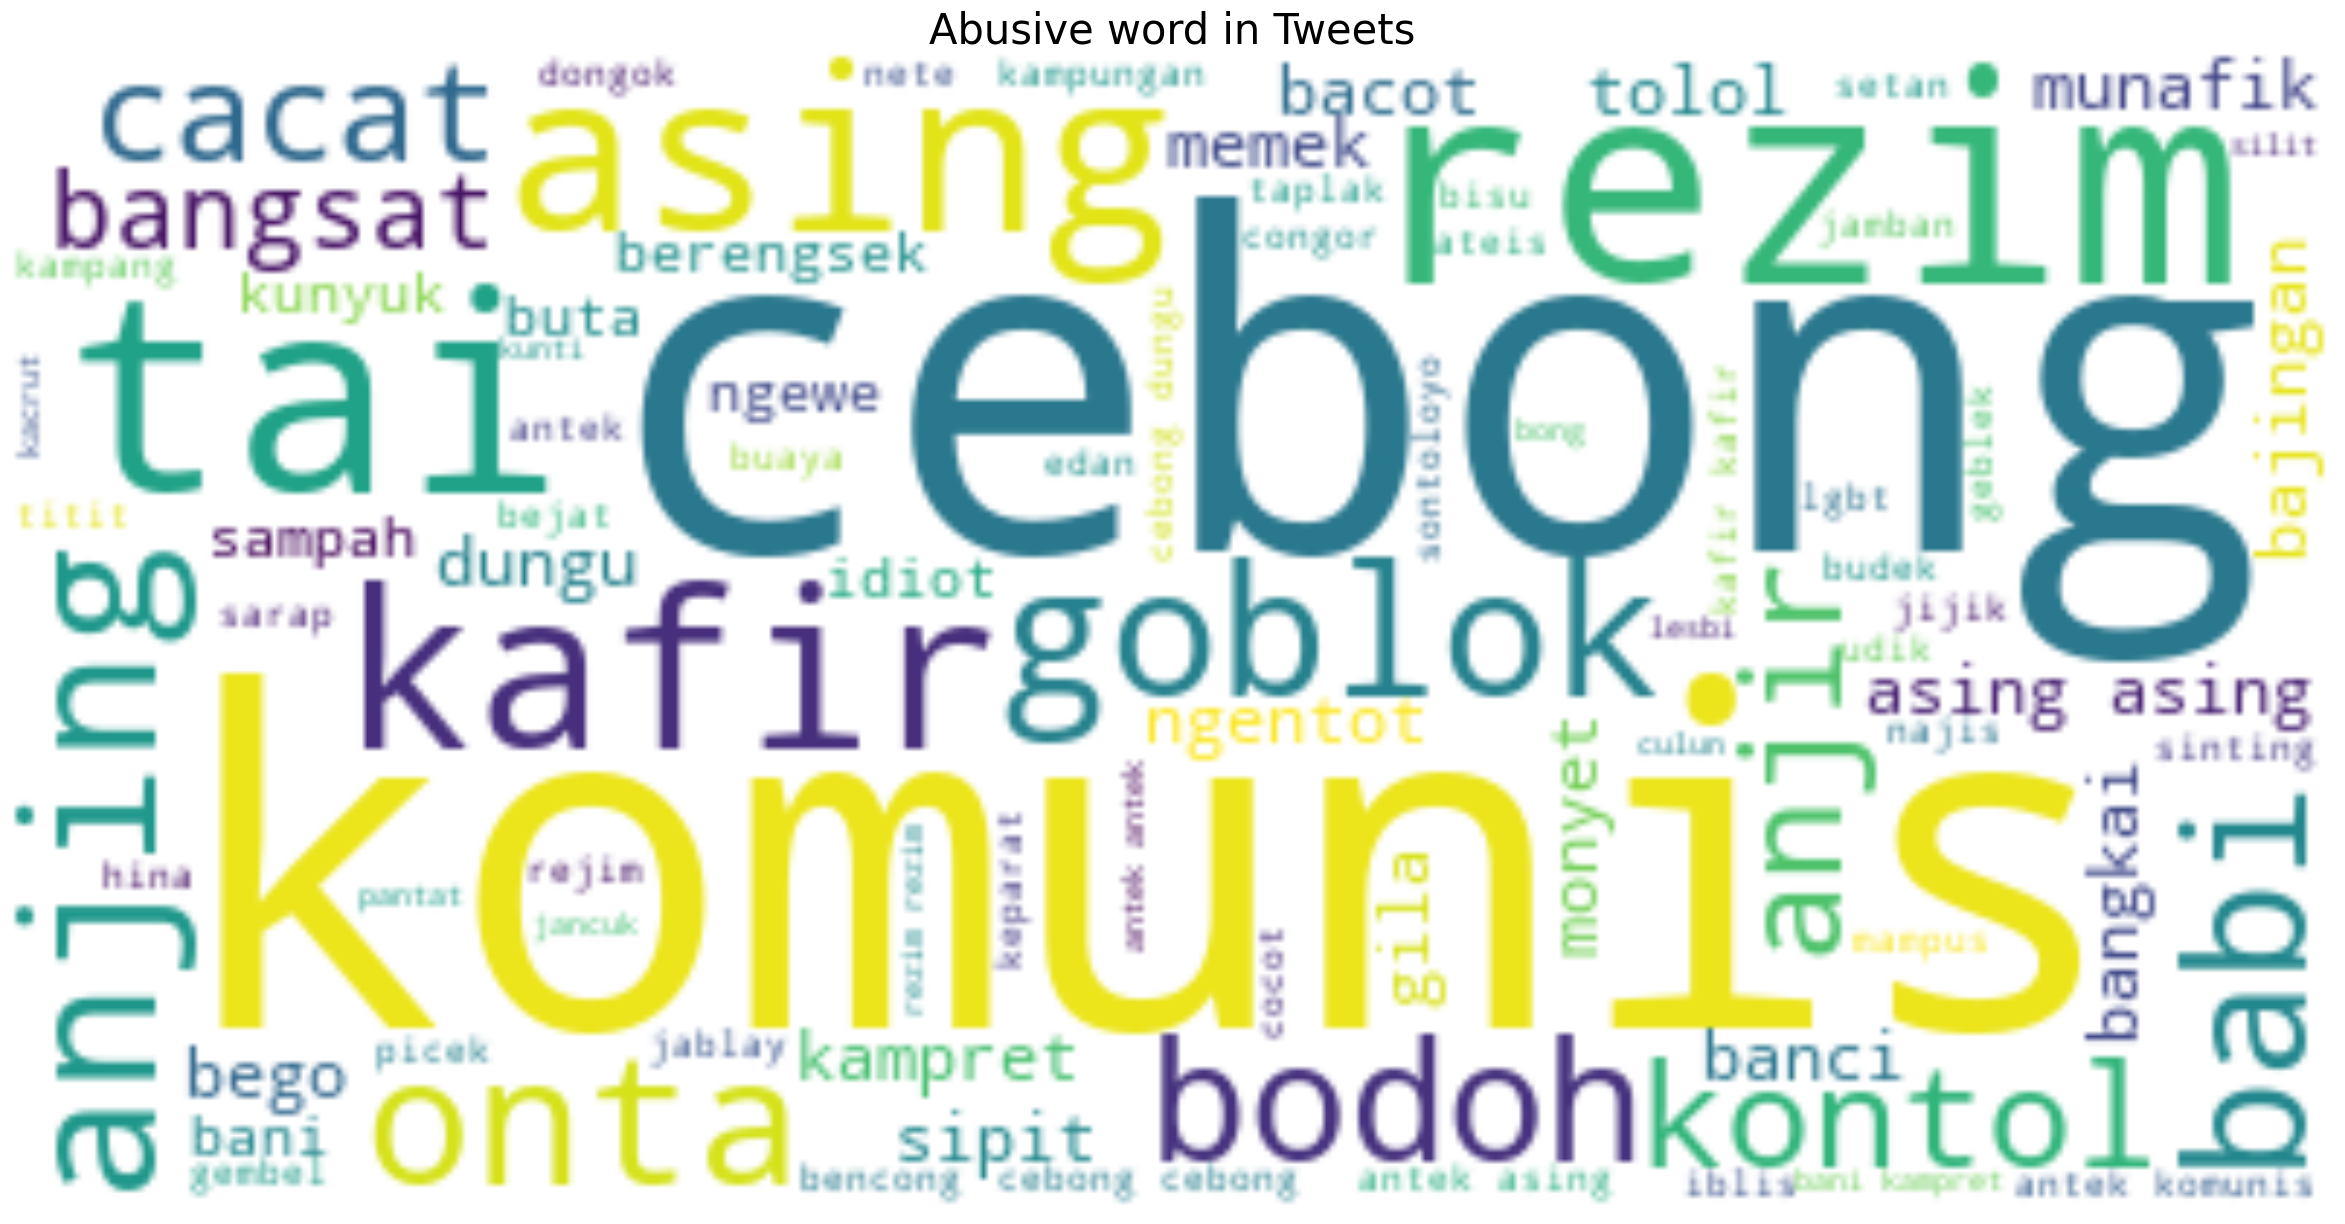

In [40]:
from wordcloud import WordCloud, ImageColorGenerator

# Start with one review:
tweet_Abusive = " ".join(review for review in df_filter.Abusive_word_2)

# Create and generate a word cloud image:
wordcloud_Abusive = WordCloud(max_font_size=80, max_words=124, background_color="white").generate(tweet_Abusive )

# Display the generated image:
plt.figure(figsize  = (30,30))
plt.imshow(wordcloud_Abusive, interpolation='bilinear')
plt.title('Abusive word in Tweets', fontsize=30)
plt.axis('off')